In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
image_side_dimension = 28
h_dim_gen = 256
h_dim_disc = 256
learning_rate = 0.001

In [7]:
xavier_init = tf.contrib.layers.xavier_initializer()

In [8]:
#Discriminator netowrk
X = tf.placeholder(tf.float32, shape=[None, 28 * 28], name='X')
D_W1 = tf.Variable(xavier_init([28*28, h_dim_disc]), name='D_W1')
D_b1 = tf.Variable(tf.zeros(shape=[h_dim_disc]), name='D_b1')
D_W2 = tf.Variable(xavier_init([h_dim_disc, 1]), name='D_W2')
D_b2 = tf.Variable(tf.zeros(shape=[1]), name='D_b2')

In [9]:
D_theta = [D_W1, D_b1, D_W2, D_b2]

In [10]:
#Generator network
Z = tf.placeholder(tf.float32, shape=[None, 100], name='Z')
G_W1 = tf.Variable(xavier_init([100, h_dim_gen]), name='G_W1')
G_b1 = tf.Variable(tf.zeros(shape=[h_dim_gen]), name='G_b1')
G_W2 = tf.Variable(xavier_init([h_dim_gen, 28 * 28]), name='G_W2')
G_b2 = tf.Variable(tf.zeros(shape=[28 * 28]), name='G_b2')
    

In [11]:
G_theta = [G_W1, G_b1, G_W2, G_b2]

In [12]:
def discriminator(x):
    D_h1 = tf.nn.relu(tf.matmul(x, D_W1) + D_b1)
    D_logit = tf.matmul(D_h1, D_W2) + D_b2
    D_prob = tf.sigmoid(D_logit)
    
    return D_prob, D_logit

In [13]:
def generator(z):
    G_h1 = tf.nn.relu(tf.matmul(z, G_W1) + G_b1)
    G_logit = tf.matmul(G_h1, G_W2) + G_b2
    G_prob = tf.sigmoid(G_logit)
    
    return G_prob

In [14]:
def sample_Z(m, n):
    return np.random.uniform(-1.0, 1.0, size=[m, n])

In [15]:
G_sample = generator(Z)
D_real, D_logit_real = discriminator(X)
D_fake, D_logit_fake = discriminator(G_sample)

In [16]:
D_loss = -tf.reduce_mean(tf.log(D_real) + tf.log(1.0 - D_fake))
G_loss = -tf.reduce_mean(tf.log(D_fake))

In [17]:
D_optimizer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss, var_list=D_theta)
G_optimizer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss, var_list=G_theta)

In [18]:
num_iters = 10000
minibatch_size = 128
Z_dim = 100

In [20]:
session = tf.Session()
session.run(tf.initialize_all_variables())

In [21]:
import os
if not os.path.exists('../out/'):
    os.makedirs('../out/')

In [22]:
i = 0
from matplotlib.pyplot import *

In [23]:
# for it in range(1000000):
#     if it % 100 == 0:
#         samples = sess.run(G_sample, feed_dict={Z: sample_Z(16, Z_dim)})

#         fig = plot(samples)
#         plt.savefig('../out/{}.png'.format(str(i).zfill(3)), bbox_inches='tight')
#         i += 1
#         plt.show()
#         plt.close(fig)

#     X_mb, _ = mnist.train.next_batch(minibatch_size)

#     _, D_loss_curr = sess.run([D_optimizer, D_loss], feed_dict={X: X_mb, Z: sample_Z(minibatch_size, Z_dim)})
#     _, G_loss_curr = sess.run([G_optimizer, G_loss], feed_dict={Z: sample_Z(minibatch_size, Z_dim)})

#     if it % 100 == 0:
#         print('Iter: {}'.format(it))
#         print('D loss: {:.4}'. format(D_loss_curr))
#         print('G_loss: {:.4}'.format(G_loss_curr))
#         print()

Minibatch G loss at step 0: nan


/home/mahlet/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/home/mahlet/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/home/mahlet/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:412: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/mahlet/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:417: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/home/mahlet/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:916: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/mahlet/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:718: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subo

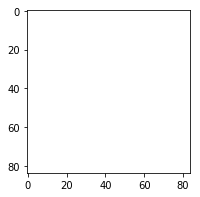

Minibatch G loss at step 200: nan
Minibatch G loss at step 400: nan
Minibatch G loss at step 600: nan
Minibatch G loss at step 800: nan
Minibatch G loss at step 1000: nan


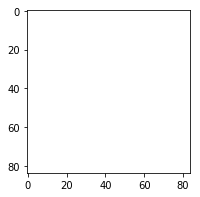

Minibatch G loss at step 1200: nan
Minibatch G loss at step 1400: nan
Minibatch G loss at step 1600: nan


In [ ]:
for iter in range(num_iters):
    X_batch, _ = mnist.train.next_batch(minibatch_size)
    Z_sample = sample_Z(minibatch_size, 100)
    _, D_loss_curr = session.run([D_optimizer, D_loss], feed_dict={X: X_batch, Z: Z_sample})
    _, G_loss_curr = session.run([G_optimizer, G_loss], feed_dict={Z: Z_sample})
    
    if (iter%200) == 0:
#         print("Minibatch D loss at step %d: %f" % (iter, D_loss_curr))
        print("Minibatch G loss at step %d: %f" % (iter, G_loss_curr))

    if (iter%1000) == 0:
        n = 3
        canvas = np.empty((28 * n, 28 * n))
        for i in range(n):
            Z_test_sample = sample_Z(n, 100)
            G_test_sample = session.run(G_sample, feed_dict={Z: Z_test_sample})
            
            G_test_sample = np.multiply((G_test_sample - 1.0), 1.0)
            for j in range(n):
                canvas[i*image_side_dimension:(i+1)*image_side_dimension, j*image_side_dimension:(j+1)*image_side_dimension] = G_test_sample[j].reshape([image_side_dimension, image_side_dimension])
        
        plt.figure(figsize=(n, n))
        plt.imshow(canvas, origin="upper", cmap="gray")
        plt.show()